# overview
In this notebook we want to see if the trials in active and passive blocks are significantly differnt from each other.

# load data for one insertion

In [20]:
import os
import pickle
import numpy as np
pid = 'b114e7e0-92b3-43bb-9529-53860e52606d'
base_path = '/mnt/data/AdaptiveControl/IBLrawdata/classification/preprocess_firingRate'
path = os.path.join(base_path, f'{pid}.pkl')
with open(path, 'rb') as f:
    data = pickle.load(f)
firing_rate = data['firing_rates']
trial_info = data['trial_info'] # dictionary keys ['trial_index', 'labels', 'contrasts', 'distance_to_change', 'prob_left', 'probe_id', 'experiment_id']
depth_info = data['depth_info'] # dictionary keys ['depth', 'ids', 'acronyms', 'ch_indexs', 'x_coordinates', 'y_coordinates', 'z_coordinates']
times = data['time_bins']
depths = np.array(depth_info['depth'])
ids = np.array(depth_info['ids'])
index_passive = [i for i, x in enumerate(trial_info['prob_left']) if not x >= 0]
index_active = [i for i, x in enumerate(trial_info['prob_left']) if x == 0.5]
firing_rate_passive_mean = firing_rate[index_passive, :, :].mean(axis=0)
firing_rate_active_mean = firing_rate[index_active, :, :].mean(axis=0) 
index_right = [i for i, x in enumerate(trial_info['labels']) if x == 1]
index_left = [i for i, x in enumerate(trial_info['labels']) if x ==0]
index_active_right = np.intersect1d(index_active, index_right)
index_active_left = np.intersect1d(index_active, index_left)
index_passive_right = np.intersect1d(index_passive, index_right)
index_passive_left = np.intersect1d(index_passive, index_left)
firing_rate_active_right = firing_rate[index_active_right, :, :].mean(axis=0)
firing_rate_active_left = firing_rate[index_active_left, :, :].mean(axis=0)
firing_rate_passive_right = firing_rate[index_passive_right, :, :].mean(axis=0)
firing_rate_passive_left = firing_rate[index_passive_left, :, :].mean(axis=0)

# plot the firing rate of the MUA in the active and passive blocks

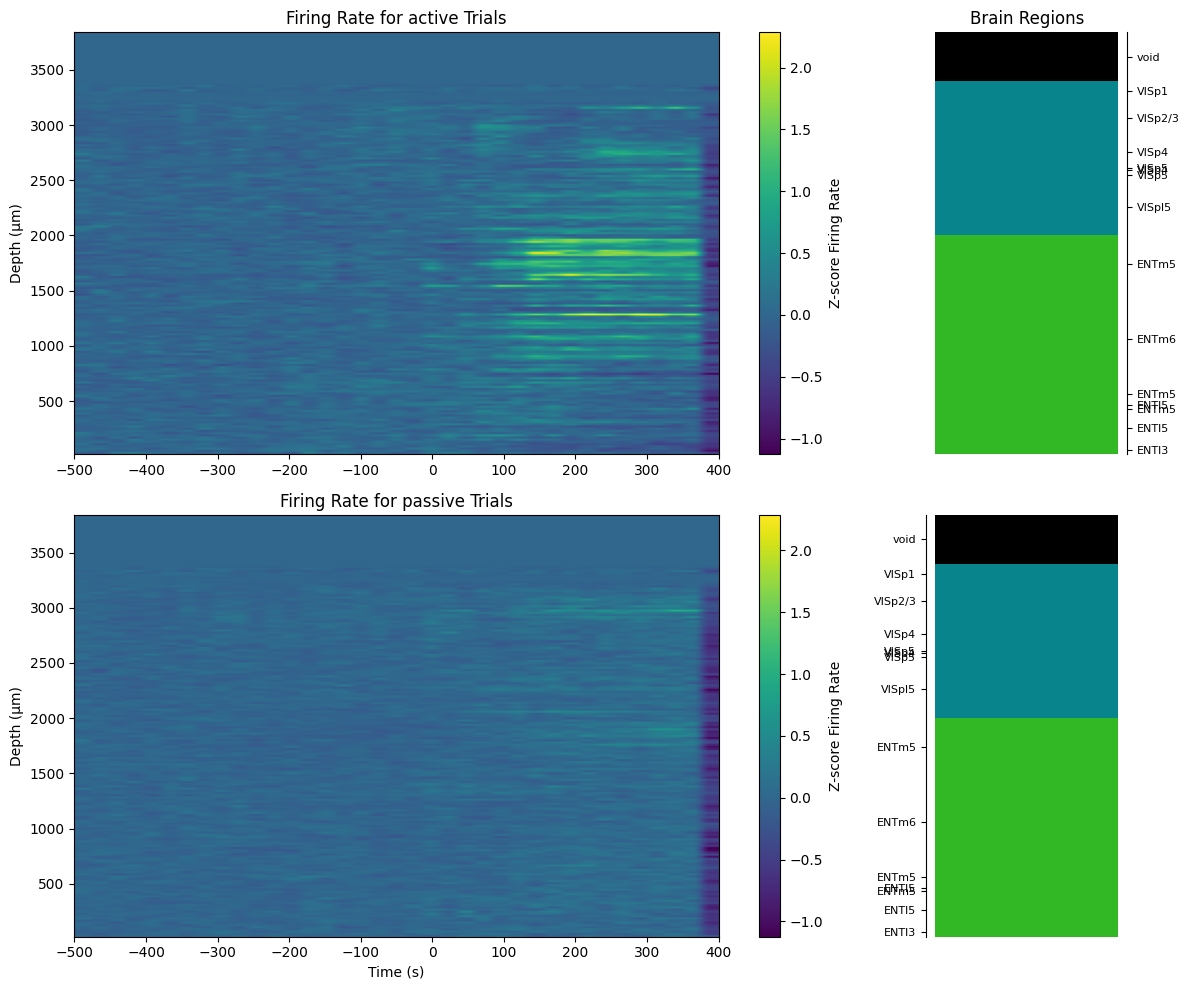

In [21]:
from brainbox.ephys_plots import plot_brain_regions
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# Define activity means and depths
firing_rate_active_mean = firing_rate_active_mean
firing_rate_passive_mean = firing_rate_passive_mean
true_depths = depths
# Calculate global min and max for color scale
global_min = min(np.nanmin(firing_rate_active_mean), np.nanmin(firing_rate_passive_mean))
global_max = max(np.nanmax(firing_rate_active_mean), np.nanmax(firing_rate_passive_mean))

# Create figure and GridSpec layout
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 2, width_ratios=[4, 1])  # 2 rows, 2 columns

# First column, first row: Right Trials
ax1 = fig.add_subplot(gs[0, 0])
im1 = ax1.imshow(firing_rate_active_mean, aspect='auto', origin='lower',
                 extent=[times[0], times[-1], depths[0], depths[-1]], 
                 cmap='viridis', vmin=global_min, vmax=global_max)
ax1.set_title('Firing Rate for active Trials')
ax1.set_ylabel('Depth (µm)')
plt.colorbar(im1, ax=ax1, label='Z-score Firing Rate')

# Second column, first row: Brain Regions for Right Trials
ax2 = fig.add_subplot(gs[0, 1])
plot_brain_regions(ids, true_depths, display=True, ax=ax2, 
                   title='Brain Regions', label='right')

# First column, second row: Left Trials
ax3 = fig.add_subplot(gs[1, 0])
im2 = ax3.imshow(firing_rate_passive_mean, aspect='auto', origin='lower',
                 extent=[times[0], times[-1], depths[0], depths[-1]], 
                 cmap='viridis', vmin=global_min, vmax=global_max)
ax3.set_title('Firing Rate for passive Trials')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Depth (µm)')
plt.colorbar(im2, ax=ax3, label='Z-score Firing Rate')

# Second column, second row: Brain Regions for Left Trials
ax4 = fig.add_subplot(gs[1, 1])
plot_brain_regions(ids, true_depths, display=True, ax=ax4, 
                   title=' ', label='left')

# Layout adjustment
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

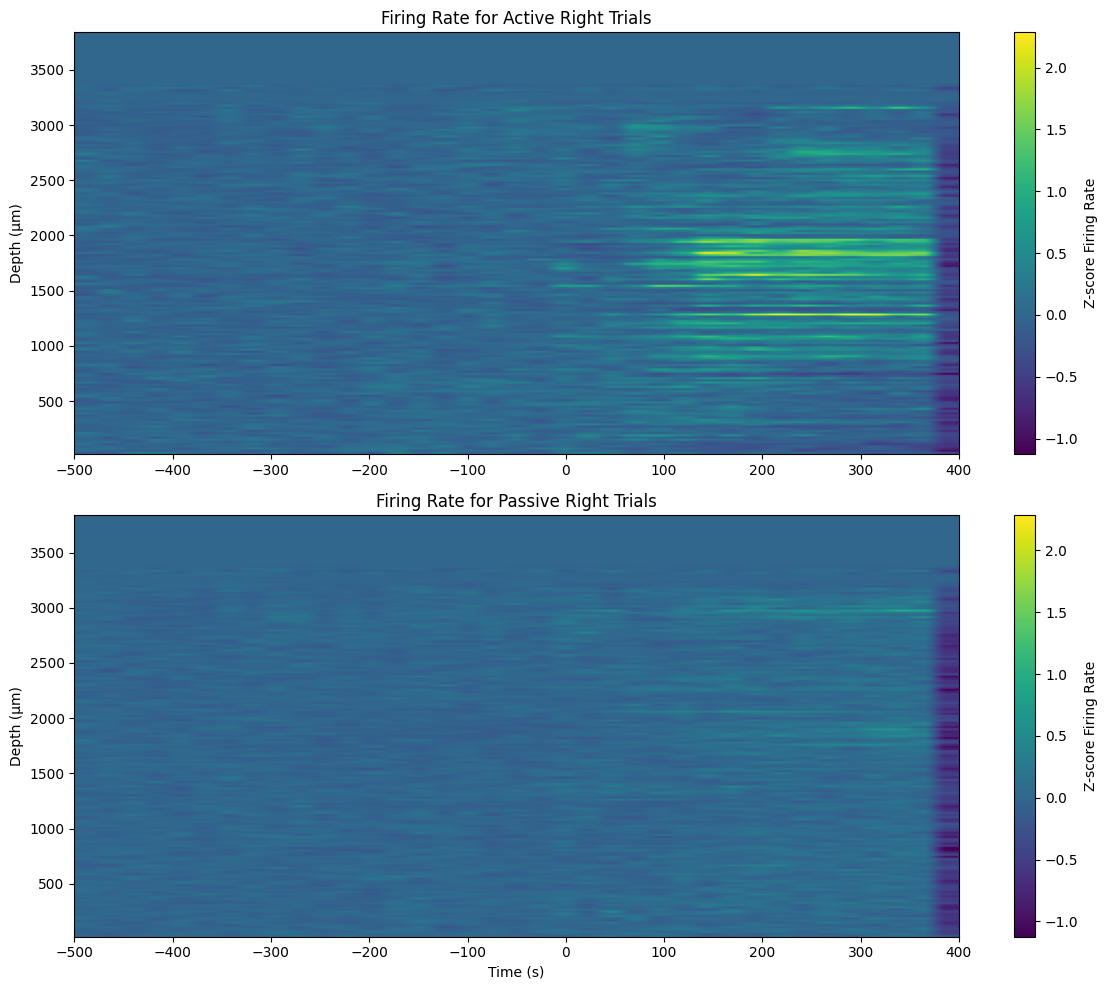

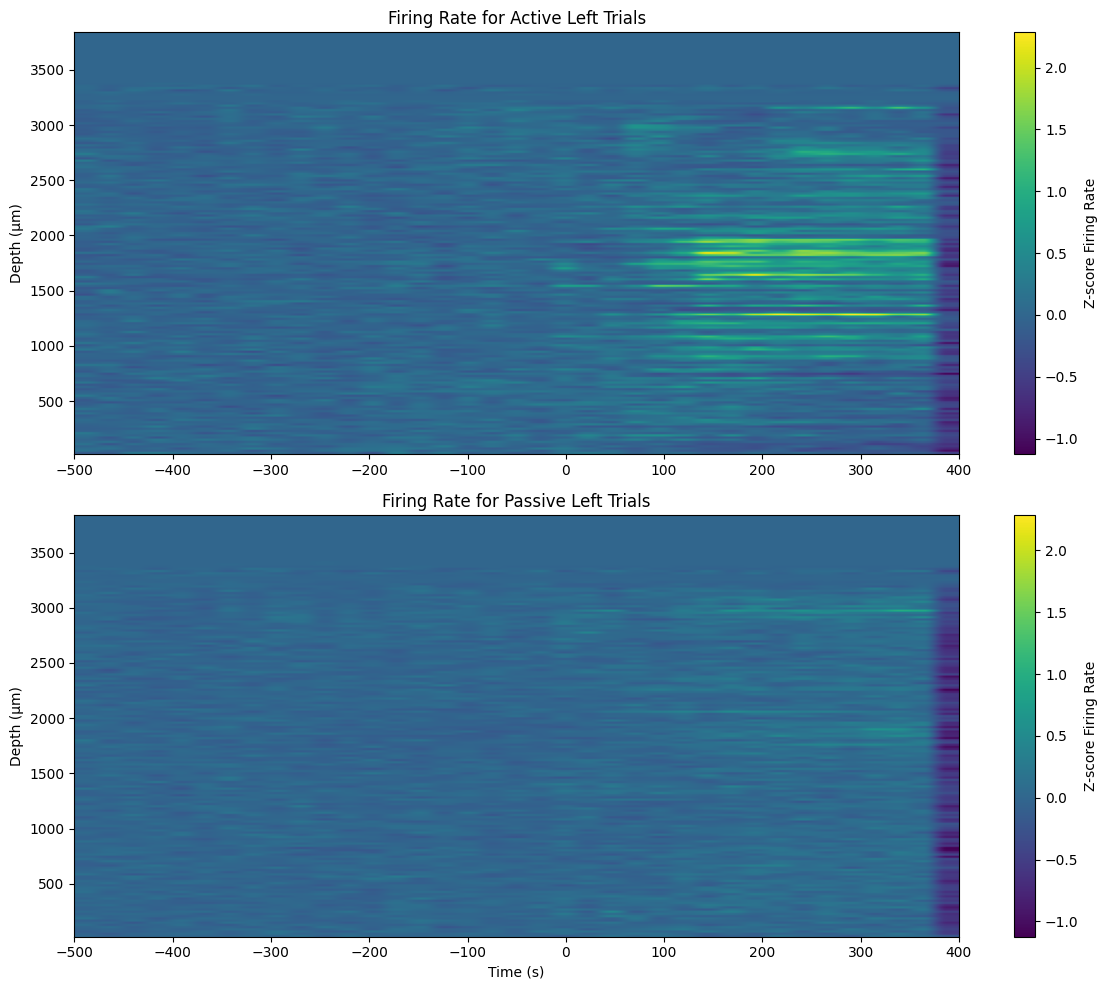

In [22]:
from brainbox.ephys_plots import plot_brain_regions
import matplotlib.pyplot as plt
import numpy as np

# Define activity means and depths
firing_rate_active_right = firing_rate_active_mean
firing_rate_passive_right = firing_rate_passive_mean
firing_rate_active_left = firing_rate_active_mean
firing_rate_passive_left = firing_rate_passive_mean
depths = np.array(depths)
true_depths = depths
ids = np.array(ids)

# Calculate global min and max for color scale
global_min = min(np.nanmin(firing_rate_active_right), np.nanmin(firing_rate_passive_right),
                 np.nanmin(firing_rate_active_left), np.nanmin(firing_rate_passive_left))
global_max = max(np.nanmax(firing_rate_active_right), np.nanmax(firing_rate_passive_right),
                 np.nanmax(firing_rate_active_left), np.nanmax(firing_rate_passive_left))

# Create figure for Right Trials
fig_right = plt.figure(figsize=(12, 10))
gs_right = plt.GridSpec(2, 1, height_ratios=[1, 1])  # 2 rows, 1 column

# First row: Active Right Trials
ax1 = fig_right.add_subplot(gs_right[0, 0])
im1 = ax1.imshow(firing_rate_active_right, aspect='auto', origin='lower',
                 extent=[times[0], times[-1], depths[0], depths[-1]], 
                 cmap='viridis', vmin=global_min, vmax=global_max)
ax1.set_title('Firing Rate for Active Right Trials')
ax1.set_ylabel('Depth (µm)')
plt.colorbar(im1, ax=ax1, label='Z-score Firing Rate')

# Second row: Passive Right Trials
ax2 = fig_right.add_subplot(gs_right[1, 0])
im2 = ax2.imshow(firing_rate_passive_right, aspect='auto', origin='lower',
                 extent=[times[0], times[-1], depths[0], depths[-1]], 
                 cmap='viridis', vmin=global_min, vmax=global_max)
ax2.set_title('Firing Rate for Passive Right Trials')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Depth (µm)')
plt.colorbar(im2, ax=ax2, label='Z-score Firing Rate')

# Layout adjustment for Right Trials
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Create figure for Left Trials
fig_left = plt.figure(figsize=(12, 10))
gs_left = plt.GridSpec(2, 1, height_ratios=[1, 1])  # 2 rows, 1 column

# First row: Active Left Trials
ax3 = fig_left.add_subplot(gs_left[0, 0])
im3 = ax3.imshow(firing_rate_active_left, aspect='auto', origin='lower',
                 extent=[times[0], times[-1], depths[0], depths[-1]], 
                 cmap='viridis', vmin=global_min, vmax=global_max)
ax3.set_title('Firing Rate for Active Left Trials')
ax3.set_ylabel('Depth (µm)')
plt.colorbar(im3, ax=ax3, label='Z-score Firing Rate')

# Second row: Passive Left Trials
ax4 = fig_left.add_subplot(gs_left[1, 0])
im4 = ax4.imshow(firing_rate_passive_left, aspect='auto', origin='lower',
                 extent=[times[0], times[-1], depths[0], depths[-1]], 
                 cmap='viridis', vmin=global_min, vmax=global_max)
ax4.set_title('Firing Rate for Passive Left Trials')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Depth (µm)')
plt.colorbar(im4, ax=ax4, label='Z-score Firing Rate')

# Layout adjustment for Left Trials
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# use t-test to see if the firing rate is significantly different in the two blocks

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

def perform_statistical_test(data1, data2, test_type='t-test'):
    """
    Perform statistical comparison between two datasets for each channel over time.

    Parameters:
    - data1, data2: Arrays with shape (trials, channels, time)
    - test_type: 't-test' or 'mannwhitney'

    Returns:
    - p_values: Array of p-values for each channel over time
    """
    # Assume data1 and data2 have shapes (trials, channels, time)
    channels, time_points = data1.shape[1], data1.shape[2]
    p_values = np.zeros((channels, time_points))

    # Define significance threshold
    alpha = 0.05

    # Loop over channels and time points
    for ch in range(channels):
        for t in range(time_points):
            # Extract data for the current channel and time
            data1_samples = data1[:, ch, t]
            data2_samples = data2[:, ch, t]

            # Perform a two-sample t-test
            _, p_val = ttest_ind(data1_samples, data2_samples, equal_var=False)

            # Store the p-value
            p_values[ch, t] = p_val
    # Count the number of significant comparisons
    significant_differences = (p_values < alpha).sum()
    total_comparisons = channels * time_points
    percentage_significant = (significant_differences / total_comparisons) * 100

    print(f"Percentage of significant differences: {percentage_significant:.2f}%")

    
print("Active vs Passive")
perform_statistical_test(firing_rate[index_active, :, :], firing_rate[index_passive, :, :])
print("Active Right vs Passive Right")
perform_statistical_test(firing_rate[index_active_right, :, :], firing_rate[index_passive_right, :, :])
print("Active Left vs Passive Left")
perform_statistical_test(firing_rate[index_active_left, :, :], firing_rate[index_passive_left, :, :])


Active vs Passive
Percentage of significant differences: 14.12%
Active Right vs Passive Right
Percentage of significant differences: 12.39%
Active Left vs Passive Left
Percentage of significant differences: 10.32%
